### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
plt.rcParams['figure.figsize'] = [20,10]

### Importing Dataset

In [3]:
df = pd.read_csv('all_matches.csv')
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(260920, 22)

In [5]:
df.dtypes

match_id                  int64  
season                    object 
start_date                object 
venue                     object 
innings                   int64  
ball                      float64
batting_team              object 
bowling_team              object 
striker                   object 
non_striker               object 
bowler                    object 
runs_off_bat              int64  
extras                    int64  
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type               object 
player_dismissed          object 
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

### Data Cleaning and Processing

In [6]:
df['innings'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [7]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [8]:
df['innings'].unique()

array([1, 2], dtype=int64)

In [9]:
df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', 2012, 2013, 2014,
       2015, 2016, 2017, 2019, 2018, '2018', '2019', '2020/21', '2021',
       2021, 2022, 2023, 2024], dtype=object)

In [10]:
def clean_data(x):
    return str(x).replace('/', '')

df['season'] = df['season'].apply(clean_data)

In [11]:
df['season'].unique()

array(['200708', '2009', '200910', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2019', '2018', '202021', '2021', '2022', '2023',
       '2024'], dtype=object)

In [12]:
def remove_suffixes(x):
    date = str(x)
    
    for suffix in ['08', '10', '21']:
        if date.endswith(suffix):
            date = date[:-2]
            
    return date

df['season'] = df['season'].apply(remove_suffixes)

In [13]:
df['season'].unique()

array(['2007', '2009', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2019', '2018', '2020', '20', '2022', '2023', '2024'],
      dtype=object)

In [14]:
df['season'] = df['season'].astype('int64')

In [15]:
df.dtypes

match_id                  int64  
season                    int64  
start_date                object 
venue                     object 
innings                   int64  
ball                      float64
batting_team              object 
bowling_team              object 
striker                   object 
non_striker               object 
bowler                    object 
runs_off_bat              int64  
extras                    int64  
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type               object 
player_dismissed          object 
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [16]:
df = df[df.season >= 2022]

In [17]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208042,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,0.1,Chennai Super Kings,Kolkata Knight Riders,RD Gaikwad,DP Conway,UT Yadav,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208043,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,0.2,Chennai Super Kings,Kolkata Knight Riders,RD Gaikwad,DP Conway,UT Yadav,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208044,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,0.3,Chennai Super Kings,Kolkata Knight Riders,RD Gaikwad,DP Conway,UT Yadav,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208045,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,0.4,Chennai Super Kings,Kolkata Knight Riders,RD Gaikwad,DP Conway,UT Yadav,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208046,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,0.5,Chennai Super Kings,Kolkata Knight Riders,RD Gaikwad,DP Conway,UT Yadav,0,0,NaN,NaN,NaN,NaN,NaN,caught,RD Gaikwad,NaN,NaN


In [18]:
df['season'].unique()

array([2022, 2023, 2024], dtype=int64)

In [19]:
df['batting_team'].unique()

array(['Chennai Super Kings', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Delhi Capitals', 'Royal Challengers Bangalore', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Royal Challengers Bengaluru'], dtype=object)

In [20]:
df[df.batting_team == 'Chennai Super Kings']['striker'].unique()

array(['RD Gaikwad', 'RV Uthappa', 'DP Conway', 'AT Rayudu', 'RA Jadeja',
       'S Dube', 'MS Dhoni', 'MM Ali', 'D Pretorius', 'DJ Bravo',
       'CJ Jordan', 'Mukesh Choudhary', 'MJ Santner', 'Simarjeet Singh',
       'M Theekshana', 'N Jagadeesan', 'BA Stokes', 'AM Rahane',
       'DL Chahar', 'TU Deshpande', 'R Ravindra', 'DJ Mitchell',
       'Sameer Rizvi', 'SN Thakur', 'RJ Gleeson'], dtype=object)

In [21]:
req_df = df[df.striker == 'MS Dhoni']

In [22]:
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208111,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,10.6,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,AD Russell,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208113,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,11.2,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,CV Varun,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208114,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,11.3,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,CV Varun,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208115,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,11.4,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,CV Varun,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208117,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,11.6,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RA Jadeja,CV Varun,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
## Runs scored by MSD between 2022-2024
sum(req_df.runs_off_bat)

497

In [24]:
## Balls faced by MSD between 2022-2024
len(req_df)

343

In [25]:
## Strike Rate of MSD between 2022-2024
round(100*sum(req_df.runs_off_bat)/len(req_df), 1)

144.9

In [26]:
msdf = pd.DataFrame(req_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [27]:
msdf.head()

,striker,runs_off_bat
0,MS Dhoni,497


In [28]:
msdf1 = pd.DataFrame(req_df.groupby('striker')['ball'].count()).reset_index()

In [29]:
msdf1.head()

,striker,ball
0,MS Dhoni,343


In [30]:
msdf3 = msdf.merge(msdf1, on= 'striker', how= 'left')

In [31]:
msdf3.head()

,striker,runs_off_bat,ball
0,MS Dhoni,497,343


In [32]:
msdf3['strike_rate'] = round(100*sum(req_df.runs_off_bat)/len(req_df), 1)

In [33]:
## MSD runs scored, balls faced, strike rate between 2022-2024
msdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,MS Dhoni,497,343,144.9


### MSD's stats per season from 2022-2024

In [34]:
msdf2 = pd.DataFrame(req_df.groupby('season')['runs_off_bat'].sum()).reset_index()

In [35]:
msdf2.head()

,season,runs_off_bat
0,2022,232
1,2023,104
2,2024,161


In [36]:
msdf4 = pd.DataFrame(req_df.groupby('season')['ball'].count()).reset_index()

In [37]:
msdf4.head()

,season,ball
0,2022,198
1,2023,63
2,2024,82


In [38]:
msdf5 = msdf2.merge(msdf4, on= 'season', how= 'left')

In [39]:
msdf5.head()

,season,runs_off_bat,ball
0,2022,232,198
1,2023,104,63
2,2024,161,82


In [40]:
msdf5['strike_rate'] = round(100*msdf2['runs_off_bat']/ msdf4['ball'], 1)

In [41]:
msdf5.head()

,season,runs_off_bat,ball,strike_rate
0,2022,232,198,117.2
1,2023,104,63,165.1
2,2024,161,82,196.3


In [ ]:
## From the above stats we can see that between these three years MSD's runs and strike rate has increased gradually

### Comparing Stats with different batsman between 2022-2024

In [42]:
## Runs scored by each player between 2022-2024
df1 = pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [43]:
df1.head()

,striker,runs_off_bat
0,A Badoni,634
1,A Kamboj,2
2,A Manohar,231
3,A Mishra,19
4,A Nortje,42


In [44]:
## Balls faced by each player between 2022-2024
df2 = pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index()

In [45]:
df2.head()

,striker,ball
0,A Badoni,505
1,A Kamboj,2
2,A Manohar,181
3,A Mishra,30
4,A Nortje,45


In [46]:
df3 = df1.merge(df2, on= 'striker', how= 'left')

In [47]:
df3.head()

,striker,runs_off_bat,ball
0,A Badoni,634,505
1,A Kamboj,2,2
2,A Manohar,231,181
3,A Mishra,19,30
4,A Nortje,42,45


In [48]:
## Strike Rate of each players between 2022-2024
df3['strike_rate'] = round(100*df3['runs_off_bat']/df3['ball'], 1)

In [49]:
df3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,634,505,125.5
1,A Kamboj,2,2,100.0
2,A Manohar,231,181,127.6
3,A Mishra,19,30,63.3
4,A Nortje,42,45,93.3


In [50]:
## Minimum 300 runs scored and 120 strike rate
df4 = df3[(df3.runs_off_bat >= 300) & (df3.strike_rate >= 120)]

In [51]:
df4.reset_index(inplace= True, drop= True)
df4.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,634,505,125.5
1,AD Russell,784,503,155.9
2,AK Markram,849,664,127.9
3,AM Rahane,701,524,133.8
4,AR Patel,700,521,134.4


In [52]:
rb = df3.sort_values('runs_off_bat', ascending= False)

In [53]:
rb.reset_index(inplace= True, drop= True)
rb.head(60)

## List of top runs scorer between 2022-2024
## Shubman Gill is the leading run scorer
## MS Dhoni ranks in 57th place

,striker,runs_off_bat,ball,strike_rate
0,Shubman Gill,1799,1251,143.8
1,V Kohli,1721,1276,134.9
2,F du Plessis,1636,1136,144.0
3,JC Buttler,1614,1160,139.1
4,RD Gaikwad,1541,1134,135.9
5,KL Rahul,1410,1117,126.2
6,SV Samson,1351,928,145.6
7,YBK Jaiswal,1318,883,149.3
8,SA Yadav,1253,759,165.1
9,Ishan Kishan,1192,902,132.2


In [54]:
sr = df4.sort_values('strike_rate', ascending= False)

In [55]:
sr.reset_index(inplace= True, drop= True)
sr.head(31)

## List of top strike rates of player between 2022-2024
## J Fraser-McGurk has the highest strike rate between 2022-2024
## MS Dhoni ranks in 30th place 

,striker,runs_off_bat,ball,strike_rate
0,J Fraser-McGurk,330,150,220.0
1,TM Head,567,307,184.7
2,Rashid Khan,323,185,174.6
3,PD Salt,653,385,169.6
4,T Stubbs,405,239,169.5
5,H Klaasen,927,555,167.0
6,GJ Maxwell,753,455,165.5
7,SA Yadav,1253,759,165.1
8,KD Karthik,796,489,162.8
9,SP Narine,580,360,161.1


In [ ]:
## From the runs scored and strike rate between 2022-2024. Dhoni stands at 60th place in terms of runs scored and 30th place in
## terms of strike rate so this is not a good stats

### Visualizations

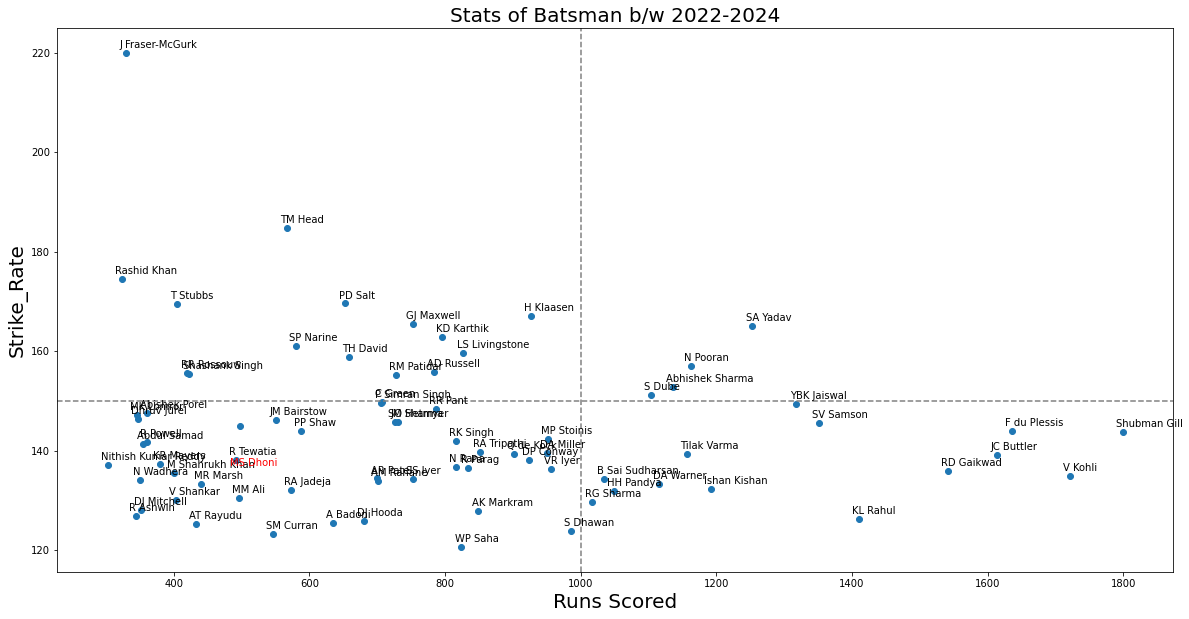

In [58]:
plt.scatter(df4.runs_off_bat, df4.strike_rate)

for i in range(len(df4)):
    if df4['striker'][i] == 'MS Dhoni':
        plt.text(df4['runs_off_bat'][i] -14, df4['strike_rate'][i] -8, df4['striker'][i], color= 'red')
    else:
        plt.text(df4['runs_off_bat'][i] -10, df4['strike_rate'][i] +1, df4['striker'][i])

plt.title('Stats of Batsman b/w 2022-2024', fontsize = 20)
plt.axvline(1000, ls = '--' , color = 'grey')
plt.axhline(150, ls = '--' , color = 'grey')
plt.xlabel('Runs Scored', fontsize =20)
plt.ylabel('Strike_Rate', fontsize=20)
plt.show()

#### * From the above plot we can see that players like SKY, Nicholas Pooran has scored most runs with impressive strike rate
#### * Players like Dinesh kartik, Tim David has high strike rate but runs scored are less
#### * Players like Shubman Gill, Jos Buttler has scored most runs but their strike rate are neither high nor low it is in moderate range and it is acceptable
#### * Finally if we see Dhoni's stats runs scored and strike rate is considerably low and his stats are not good. Hence he is in bottom quartile

### Comparing stats of middle order wicket keepers

In [59]:
dfwk = df3[(df3.striker == 'MS Dhoni')| (df3.striker == 'RR Pant')|(df3.striker == 'KL Rahul')|(df3.striker == 'KD Karthik')|(df3.striker == 'Ishan Kishan')|(df.striker == 'H Klaasen')]

In [60]:
dfwk

,striker,runs_off_bat,ball,strike_rate
80,Ishan Kishan,1192,902,132.2
101,KD Karthik,796,489,162.8
105,KL Rahul,1410,1117,126.2
143,MS Dhoni,497,343,144.9
203,RR Pant,786,530,148.3


In [61]:
dfwk.sort_values('runs_off_bat', ascending= False)

,striker,runs_off_bat,ball,strike_rate
105,KL Rahul,1410,1117,126.2
80,Ishan Kishan,1192,902,132.2
101,KD Karthik,796,489,162.8
203,RR Pant,786,530,148.3
143,MS Dhoni,497,343,144.9


In [62]:
dfwk.sort_values('strike_rate', ascending= False)

,striker,runs_off_bat,ball,strike_rate
101,KD Karthik,796,489,162.8
203,RR Pant,786,530,148.3
143,MS Dhoni,497,343,144.9
80,Ishan Kishan,1192,902,132.2
105,KL Rahul,1410,1117,126.2


In [ ]:
## From the middle order wicket keeper batsman also MSD's stats is quite average. Strike Rate is on lower side

### Visualizations for middle order wicket keeper batsman

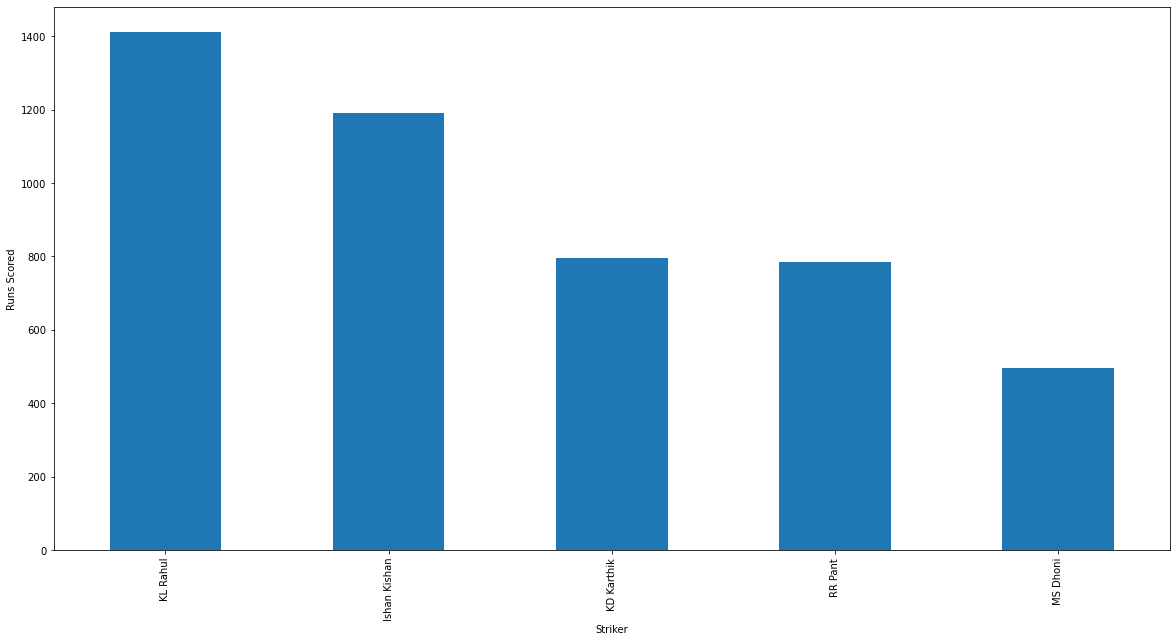

In [63]:
dfwk.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).plot(kind= 'bar')
plt.xlabel('Striker')
plt.ylabel('Runs Scored')
plt.show()

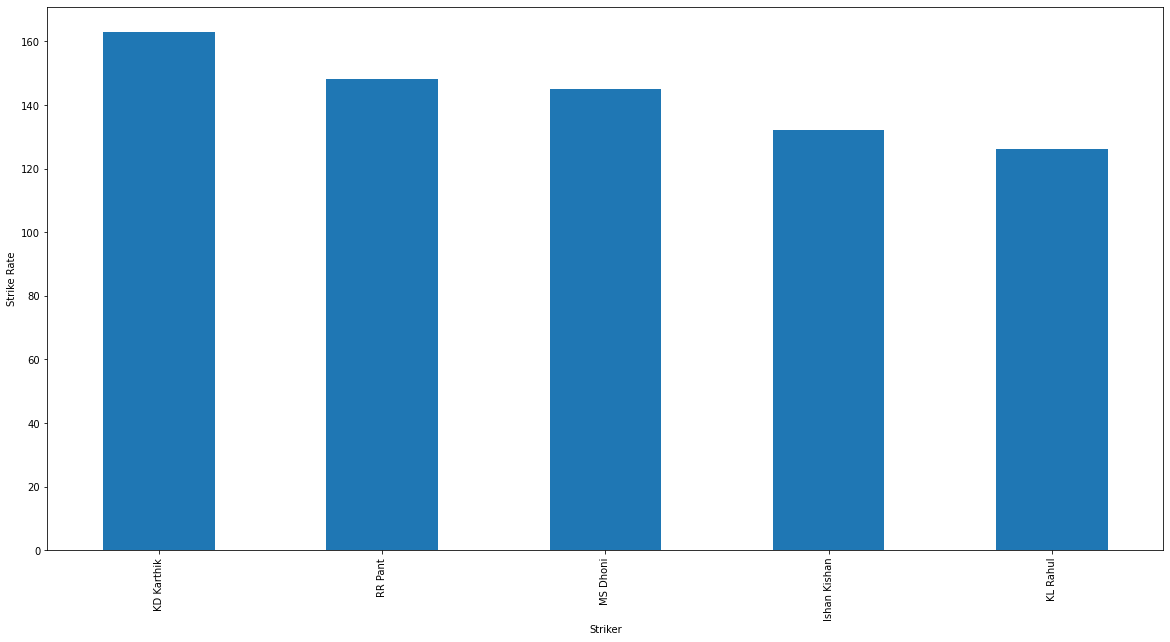

In [65]:
dfwk.groupby(['striker'])['strike_rate'].sum().sort_values(ascending = False).plot(kind= 'bar')
plt.xlabel('Striker')
plt.ylabel('Strike Rate')
plt.show()

### MSD's stats yearwise for Death Overs(16-20) between 2022-2024

In [66]:
dof = pd.DataFrame(df[(df.ball >= 16) & (df.striker == 'MS Dhoni')].groupby(['season', 'striker'])['runs_off_bat'].sum())

In [67]:
dof.head()

,,runs_off_bat
season,striker,
2022,MS Dhoni,153
2023,MS Dhoni,102
2024,MS Dhoni,154


In [68]:
dof1 = pd.DataFrame(df[(df.ball >= 16) & (df.striker == 'MS Dhoni')].groupby(['season', 'striker'])['ball'].count())

In [69]:
dof1.head()

,,ball
season,striker,
2022,MS Dhoni,93
2023,MS Dhoni,59
2024,MS Dhoni,78


In [70]:
dof.merge(dof1, on= 'season', how= 'left')

,runs_off_bat,ball
season,,
2022,153,93
2023,102,59
2024,154,78


In [71]:
dof['strike_rate'] = round(100*(dof['runs_off_bat']/dof1['ball']), 1)

In [72]:
dof.head()

,,runs_off_bat,strike_rate
season,striker,,
2022,MS Dhoni,153,164.5
2023,MS Dhoni,102,172.9
2024,MS Dhoni,154,197.4


### Stats of Batsmen in Death Overs(16-20) between 2022-2024

In [73]:
do = pd.DataFrame(df[df['ball'] >= 16].groupby(['striker'])['runs_off_bat'].sum()).reset_index()

In [74]:
do.head()

,striker,runs_off_bat
0,A Badoni,332
1,A Manohar,85
2,A Mishra,13
3,A Nortje,39
4,A Zampa,5


In [75]:
do1 = pd.DataFrame(df[df['ball'] >= 16].groupby(['striker'])['ball'].count()).reset_index()

In [76]:
do1.head()

,striker,ball
0,A Badoni,212
1,A Manohar,47
2,A Mishra,12
3,A Nortje,38
4,A Zampa,5


In [77]:
do2 = do.merge(do1, on = 'striker', how = 'left')

In [78]:
do2.head()

,striker,runs_off_bat,ball
0,A Badoni,332,212
1,A Manohar,85,47
2,A Mishra,13,12
3,A Nortje,39,38
4,A Zampa,5,5


In [79]:
do2['strike_rate'] = round(100*do['runs_off_bat']/do1['ball'], 1)

In [80]:
do2.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,332,212,156.6
1,A Manohar,85,47,180.9
2,A Mishra,13,12,108.3
3,A Nortje,39,38,102.6
4,A Zampa,5,5,100.0


In [81]:
dor = do2.sort_values('runs_off_bat', ascending = False)

In [82]:
dor.reset_index(inplace = True, drop = True)
dor.head()

,striker,runs_off_bat,ball,strike_rate
0,KD Karthik,525,276,190.2
1,SO Hetmyer,467,251,186.1
2,TH David,451,241,187.1
3,RK Singh,414,228,181.6
4,MS Dhoni,409,230,177.8


In [83]:
# Considering minimum runs scored is 160 and strike rate is 125
dor1 = dor[(dor.runs_off_bat >= 160) & (dor.strike_rate >= 125)]

In [84]:
dor1.head()

## Dinesh Kartik scored the most runs with a good strike rate in death overs from 2022-2024
## MSD stands in 5th place which is impressive

,striker,runs_off_bat,ball,strike_rate
0,KD Karthik,525,276,190.2
1,SO Hetmyer,467,251,186.1
2,TH David,451,241,187.1
3,RK Singh,414,228,181.6
4,MS Dhoni,409,230,177.8


### Visualizations

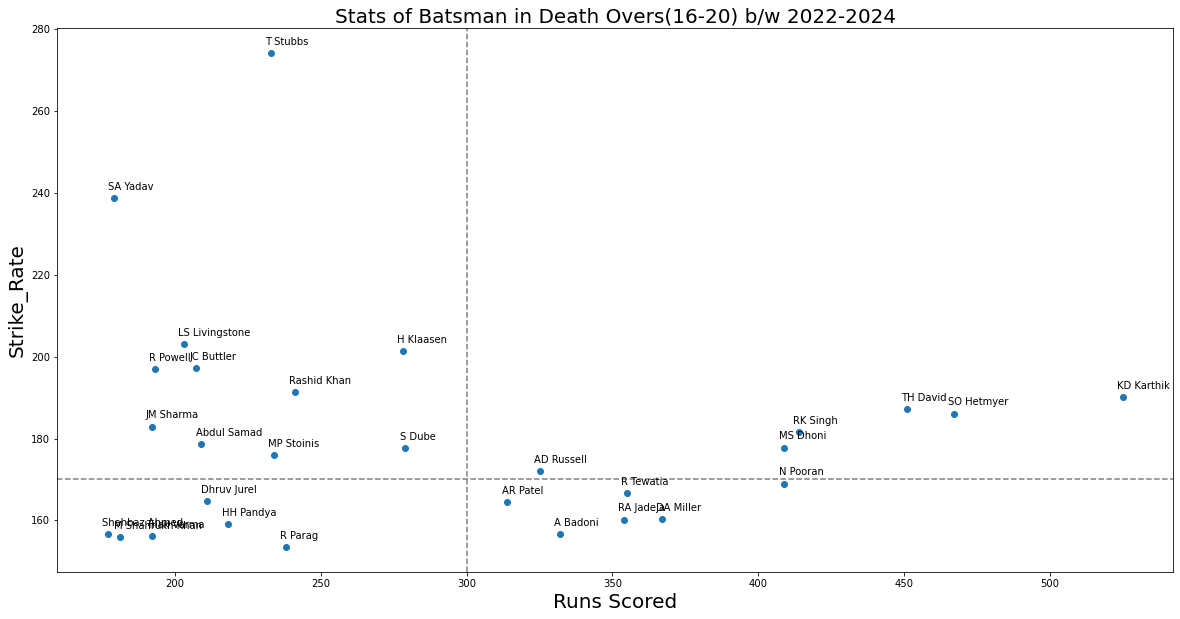

In [87]:
plt.scatter(dor1.runs_off_bat , dor1.strike_rate)

for i in range(len(dor1)):
    plt.text(dor1['runs_off_bat'][i] -2, dor1['strike_rate'][i] +2, dor1['striker'][i])

plt.title('Stats of Batsman in Death Overs(16-20) b/w 2022-2024', fontsize = 20)
plt.axvline(300, ls = '--' , color = 'grey')
plt.axhline(170, ls = '--' , color = 'grey')
plt.xlabel('Runs Scored', fontsize =20)
plt.ylabel('Strike_Rate', fontsize=20)
plt.show()

#### * As we can see from above plot players like Tim David, Dinesh Kartik, MS Dhoni have scored most runs in death overs with an impressive strike rate from 2022-2024
#### * Even though MSD stats from 2022-2024 is not good but his runs scoring and strike rate at death overs are still impressive
#### * MSD is known as a finisher and from the stats we can see that dhoni's stats are really good in death overs
#### * MSD knows how to calculate every match situation and run chases is remarkable. Hence from my analysis I conclude that MSD is still good enough to bat and win matches for his team